In [ ]:
# !pip install git+https://github.com/rodrigobercini/yfinance.git
import yfinance as yf
import bs4 as bs
import pickle
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

## Get list of tickers in the s&p 500

In [ ]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.strip('\n')
        tickers.append(ticker)
    return tickers

stock_list = save_sp500_tickers()

remov = ['BF.B','KR','KHC','SIVB','CRM','SBAC'] #these tickers are giving issues
for ticker in remov:

  stock_list.remove(ticker) #giving issues

## Scrape the data for all tickers into a dataframe

In [ ]:

#Issues with different tickers having different info - fixed by dropping some tickers


#Sample ticker to get the column names
msft = yf.Ticker("ABMD")
metrics = list(msft.info.keys())
# metrics.remove('regularMarketOpen')

#Create an empty df with each row as one ticker and each columns as one info field
# df = pd.DataFrame(columns = metrics, index = stock_list)
# s = 'BF.B'
count = 0
for ticker in stock_list:
  if count%10 is 0:
    print(count)
  count+=1
  time.sleep(0.01) #kept getting connection error from peer at 30 stocks, this seems to fix? 
  #https://stackoverflow.com/questions/52051989/requests-exceptions-connectionerror-connection-aborted-connectionreseterro
  stockInfo = yf.Ticker(ticker)
  df.loc[ticker] = [stockInfo.info[x] if x in stockInfo.info.keys() else None for x in metrics] #assign all the info to the corresponding ticker row in the df



## Save the dataframe to an excel sheet

In [ ]:
df.drop('SIVB',axis = 0, inplace = True)
df.to_excel("/content/drive/My Drive/stocks.xlsx",index_label = 'Ticker')

#This is how to read the df: 
# df = pd.read_excel("/content/drive/My Drive/stocks.xlsx",index_col = 0)

## 2) Comparing SPY/QQQ/DIA price ratios

In [ ]:
data = yf.download("SPY QQQ DIA", start="1990-01-01", end="2020-07-09")
data.dropna(inplace=True)
df = data['Adj Close']
df.head()

[*********************100%***********************]  3 of 3 completed


Text(0.5, 1.0, 'Ratio of Nasdaq to SPX and DJIA')

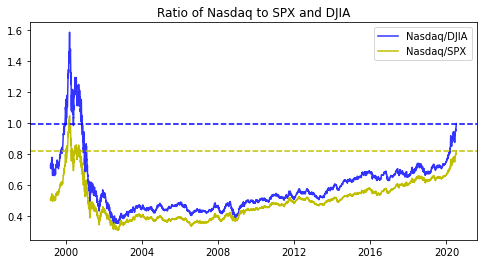

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (8,4))
ax.plot(df['QQQ']/df['DIA'],label = 'Nasdaq/DJIA',color = 'b',alpha = 0.8)
ax.plot(df['QQQ']/df['SPY'],label = 'Nasdaq/SPX',color = 'y')
ax.legend()
ax.axhline((df['QQQ']/df['DIA'])[-1],ls = '--',color = 'b')
ax.axhline((df['QQQ']/df['SPY'])[-1],ls = '--',color = 'y')
ax.set_title('Ratio of Nasdaq to SPX and DJIA')